In [6]:
import pandas as pd
import lifelines

data = lifelines.datasets.load_dd()

In [7]:
data.sample(10)

,ctryname,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed
848,Japan,740,740.0,Eastern Asia,Asia,Zenko Suzuki,Zenko Suzuki.Japan.1980.1981.Parliamentary Dem,Democracy,Parliamentary Dem,1980,2,1
1174,North Korea,731,731.0,Eastern Asia,Asia,Kim Jong Il,Kim Jong Il.North Korea.1994.2008.Civilian Dict,Non-democracy,Civilian Dict,1994,15,0
1677,Uganda,500,500.0,Eastern Africa,Africa,Sir Walter Fleming Coutts,Sir Walter Fleming Coutts.Uganda.1962.1962.Civ...,Non-democracy,Civilian Dict,1962,1,1
414,Denmark,390,390.0,Northern Europe,Europe,Poul Schluter,Poul Schluter.Denmark.1982.1992.Parliamentary Dem,Democracy,Parliamentary Dem,1982,11,1
487,El Salvador,92,92.0,Central America,Americas,Francisco Guillermo Flores Perez,Francisco Guillermo Flores Perez.El Salvador.1...,Democracy,Presidential Dem,1999,5,1
264,Canada,20,20.0,Northern America,Americas,Pierre Elliott Trudeau,Pierre Elliott Trudeau.Canada.1980.1983.Parlia...,Democracy,Parliamentary Dem,1980,4,1
1613,Thailand,800,800.0,South-Eastern Asia,Asia,Chatichai Choonhavan,Chatichai Choonhavan.Thailand.1988.1990.Parlia...,Democracy,Parliamentary Dem,1988,3,1
139,Belize,80,80.0,Central America,Americas,Said Musa,Said Musa.Belize.1998.2007.Parliamentary Dem,Democracy,Parliamentary Dem,1998,10,1
250,Cambodia,811,811.0,South-Eastern Asia,Asia,Norodom Sihanouk,Norodom Sihanouk.Cambodia.1975.1975.Civilian Dict,Non-democracy,Civilian Dict,1975,1,1
410,Denmark,390,390.0,Northern Europe,Europe,Jens-Otto Krag,Jens-Otto Krag.Denmark.1971.1971.Parliamentary...,Democracy,Parliamentary Dem,1971,1,1


### Kaplan-Meier survivor function estimation

In [10]:
kmf = lifelines.KaplanMeierFitter()

In [15]:
T = data["duration"]
E = data["observed"]

kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter: fitted with 1808 observations, 340 censored>

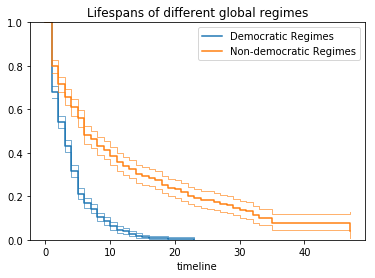

In [16]:
ax = plt.subplot(111)

dem = (data["democracy"] == "Democracy")
kmf.fit(T[dem], event_observed=E[dem], label="Democratic Regimes")
kmf.plot(ax=ax, ci_force_lines=True)
kmf.fit(T[~dem], event_observed=E[~dem], label="Non-democratic Regimes")
kmf.plot(ax=ax, ci_force_lines=True)

plt.ylim(0, 1);
plt.title("Lifespans of different global regimes");


In [17]:
from lifelines.statistics import logrank_test

results = logrank_test(T[dem], T[~dem], E[dem], E[~dem], alpha=.99)

results.print_summary()

Results
   df: 1
   alpha: 0.99
   t 0: -1
   test: logrank
   null distribution: chi squared

   __ p-value ___|__ test statistic __|____ test result ____|__ is significant __
         0.00000 |            260.470 |      Reject Null    |        True       


### Nelson Aalen (cumulative) hazard function estimator

In [20]:
from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter()

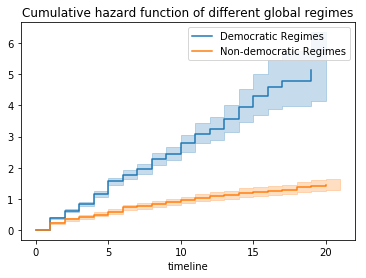

In [21]:
naf.fit(T[dem], event_observed=E[dem], label="Democratic Regimes")
ax = naf.plot(loc=slice(0, 20))
naf.fit(T[~dem], event_observed=E[~dem], label="Non-democratic Regimes")
naf.plot(ax=ax, loc=slice(0, 20))
plt.title("Cumulative hazard function of different global regimes");

#### Smoothing the cumulative hazard function

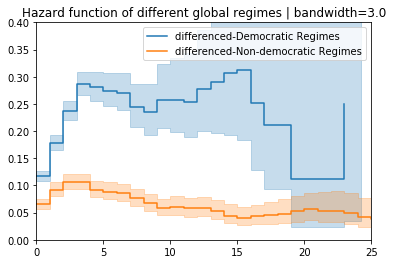

In [23]:
b = 3.
naf.fit(T[dem], event_observed=E[dem], label="Democratic Regimes")
ax = naf.plot_hazard(bandwidth=b)
naf.fit(T[~dem], event_observed=E[~dem], label="Non-democratic Regimes")
naf.plot_hazard(ax=ax, bandwidth=b)
plt.title("Hazard function of different global regimes | bandwidth=%.1f"%b);
plt.ylim(0, 0.4)
plt.xlim(0, 25);